In this assignment - we're going to dig deeper into the Women's clothing dataset from the previous assignment and start to understand what words or word combinations might help with Classification models, specifically - Sentiment Analysis models

## Load the women's clothing reviews dataset

In [1]:
# load csv file containing the reviews into a pandas dataframe called reviews and drop NaN values from the dataset
import pandas as pd
reviews = pd.read_csv('./Womens_Clothing_Reviews.csv')

print(reviews.shape)
print(reviews.columns)
print(reviews.head())

(23486, 11)
Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shir

### 1. Combine the 'Title' & 'Review Text' columns into a single column called 'Full Text' & generate a new column - 'Sentiment' using the values in the 'Recommended IND' column such that 1='Positive' and 0='Negative' (1 point)

In [2]:
# Extract and combine title text and review text from any 1000 rows of the dataset 
# into new variables - where the 'Title' text should be added to the review text 
# as the first sentence
reviews['Full Text'] = reviews['Title'] + '. ' + reviews['Review Text']
reviews = reviews.dropna()
reviews_1000 = reviews.sample(n=1000, random_state=1)

# add column 'Sentiment' that translates the 0 & 1 in the 'Recommended IND' to 
# more human readable labels - 'Positive' & 'Negative'
reviews['Sentiment'] = reviews['Recommended IND'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
reviews = reviews[['Full Text', 'Sentiment', 'Recommended IND', 'Division Name']]

reviews.head()

,Full Text,Sentiment,Recommended IND,Division Name
2,Some major design flaws. I had such high hopes...,Negative,0,General
3,"My favorite buy!. I love, love, love this jump...",Positive,1,General Petite
4,Flattering shirt. This shirt is very flatterin...,Positive,1,General
5,Not for the very petite. I love tracy reese dr...,Negative,0,General
6,Cagrcoal shimmer fun. I aded this in my basket...,Positive,1,General Petite


### 2. Generate a balanced dataset that maximizes the number of reviews in your dataset (1 point)

C:\Users\wangwilliam\AppData\Local\Temp\ipykernel_16812\3516224999.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_reviews = balanced_reviews.append(reviews[reviews['Recommended IND'] == 1].sample(n=500, random_state=1))


array([[<AxesSubplot:title={'center':'Recommended IND'}>]], dtype=object)

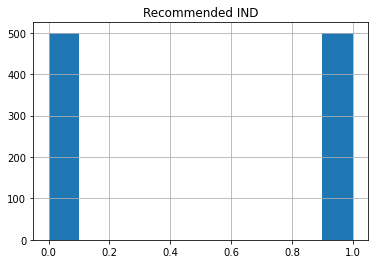

In [3]:
#Generate a dataset by sampling first 500 rows with positive negative reviews and first 500 rows with positive reviews
balanced_reviews = reviews[reviews['Recommended IND'] == 0].sample(n=500, random_state=1)
balanced_reviews = balanced_reviews.append(reviews[reviews['Recommended IND'] == 1].sample(n=500, random_state=1))

# this histogram would show you the distribution of positive vs negative reviews in the resulting dataframe 
balanced_reviews.hist(column='Recommended IND')

## EDA

In [4]:
#!pip install seaborn

### 3. Show distribution of reviews across Division Name, then show the distribution colored by 'Sentiment' (1 point)

<AxesSubplot:xlabel='Division Name', ylabel='count'>

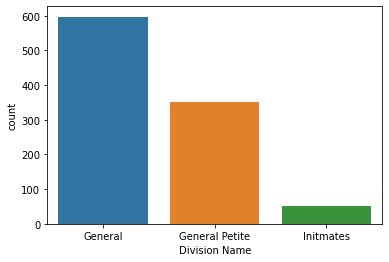

In [5]:
import seaborn as sns

# histogram of reviews by 'Division Name'
sns.countplot(x='Division Name', data=balanced_reviews)


<AxesSubplot:xlabel='Division Name', ylabel='count'>

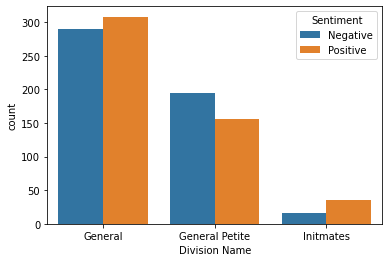

In [6]:
# histogram of reviews by 'Division Name' and by 'Sentiment'
sns.countplot(x='Division Name', hue='Sentiment', data=balanced_reviews)

### 4. Generate a list of adjectives from your positive & negative reviews (1 point)  

In [7]:
from pprint import pprint
import nltk
#nltk.download()

# generate list of adjectives from positive reviews from balanced_reviews DF
positive_adjectives = []
for review in balanced_reviews[balanced_reviews['Sentiment'] == 'Positive']['Full Text']:
    for word, pos in nltk.pos_tag(nltk.word_tokenize(review)):
        if pos == 'JJ':
            positive_adjectives.append(word)
            
pprint(positive_adjectives, compact=True)

['top', 'white', 'nice', 'heavy', 'drapey', 'i', 'nice', 'cool', 'several', 'i',
 'i', 'small', 'transitional', 'perfect', 'late', 'roomy', 'i', 'i',
 'comfortable', 'stylish', 'much', 'i', 'green', 'dime', 'disappointed', 'i',
 'great', 'true', 'dislike', 'comfortable', 'great', 'great', 'basic', 'trench',
 'feel-true', 'excellent', 'top', 'top', 'body', 'conscious', 'thick', 'broad',
 'upper', 'tts', 'i', 'many', 'perfect', 'blue', 'simple', 'beautiful', 'same',
 'same', 'little', 'bordered', 'interesting', 'tall', 'large', 'i', 'oversized',
 'much', 'small', 'okay', 'i', 'sure', 'right', 'super', 'perfect',
 'Comfortable', 'Comfortable', 'stretchy', 'Gorgeous', 'one-size', 'billowy',
 'flowing', 'black', 'black', 'similar', 'long', 'short', 'fresh', 'modern',
 'simple', 'black', 'black', 'light', 'beautiful', 'comfortable', 'great',
 'perfect', 'beautiful', 'soft', 'lightweight', 'tight', 'soft', 'casual',
 'easy', 'hard', 'Gorgeous', 'classic', 'many', 'special', 'feminine', 'black

In [8]:
# generate list of adjectives from negative reviews from our balanced_reviews DF

negative_adjectives = []
for review in balanced_reviews[balanced_reviews['Sentiment'] == 'Negative']['Full Text']:
    for word, pos in nltk.pos_tag(nltk.word_tokenize(review)):
        if pos == 'JJ':
            negative_adjectives.append(word)

pprint(negative_adjectives, compact=True)

['soooo', 'cropped', 'super', 'soft', 'cute', 'great', 'tall', 'high-waisted',
 'waist', 'big', 'thin', 'i', 'small', 'large', 'good', 'other', 'fat', 'bad',
 'cute', 'huge', 'wide', 'nice', 'bad', 'small', 'i', 'small', 'available',
 'bad', 'bad', 'excited', 'same', 'broad', 'promising', 'tie', 'dull',
 'Gorgeous', 'beautiful', 'beautiful', 'old-fashioned', 'wispy', 'beautiful',
 'elastic', 'normal-length', 'other', 'large', 'nice', 'high', 'i', 'big',
 'large', 'petite', 'available', 'sure', 'small', 'short', 'large', 'i',
 'small', 'bad', 'versatile', 'stiff', 'teeny', 'tiny', 'sad', 'huge', 'large',
 'top', 'huge', 'thick', 'uncomfortable', 'small', 'giant', 'huge', 'frumpy',
 'true', 'nice', 'vibrant', 'Tiny', 'cute', 'tiny', 'top', 'little', 'fragile',
 'curvy', 'different', 'same', 'great', 'equal', 'crazy', 'noticeable', 'sad',
 'poor', 'real', 'scratchy', 'unlined', 'uncomfortable', 'fit', 'small', 'boxy',
 'flattering', 'nice', 'itchy', 'own', 'comfortable', 'disappointed', '

In [9]:
print(len(positive_adjectives))
print(len(negative_adjectives))

3889
3557


### 5. What are the 20 most common words in our positive reviews vs negative reviews after removing all the stopwords & punctuation? (1 points)

In [10]:
# print 20 most common words from just the positive reviews from our balanced_reviews DF

from nltk.probability import FreqDist

fdist_positive = FreqDist(positive_adjectives)
print(fdist_positive.most_common(20))



[('i', 291), ('great', 150), ('small', 114), ('perfect', 90), ('top', 86), ('little', 84), ('comfortable', 83), ('soft', 79), ('nice', 78), ('beautiful', 71), ('large', 70), ('casual', 49), ('cute', 48), ('black', 43), ('much', 40), ('good', 38), ('other', 38), ('short', 37), ('many', 36), ('big', 36)]


In [11]:
# print 20 most common words from just the negative reviews from our balanced_reviews DF

fdist_negative = FreqDist(negative_adjectives)
print(fdist_negative.most_common(20))


[('i', 235), ('top', 123), ('small', 121), ('large', 84), ('great', 77), ('beautiful', 71), ('big', 68), ('nice', 61), ('short', 59), ('much', 58), ('cute', 54), ('thin', 50), ('good', 49), ('little', 47), ('huge', 42), ('other', 39), ('soft', 37), ('disappointed', 37), ('bad', 36), ('tight', 35)]


## Train model and evaluate

### 6. Split our dataset into training and testing datasets, then use word counts as features to train a Logistic Regression model (1 points)

In [12]:
# split data into test and train datasets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(balanced_reviews, train_size=0.8, random_state=0)

print(train_data.shape)
print(test_data.shape)

(800, 4)
(200, 4)


In [13]:
# generate counts
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(train_data['Full Text'])
y_train = train_data['Sentiment']



In [14]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, C=10, penalty='l2', solver='newton-cg')
lr.fit(x_train,y_train)


LogisticRegression(C=10, max_iter=1000, solver='newton-cg')

### 7. Check model performance using the testing/validation dataset (1 point)

In [15]:
# predict sentiment on the testing dataset
from datetime import datetime

start = datetime.now()
lr_pred_class = lr.predict(count_vectorizer.transform(test_data['Full Text']))
test_data['LR_pred'] = lr_pred_class

print(lr_pred_class.shape)

(200,)


In [16]:
# print model precision, recall and accuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision: {}".format(precision_score(test_data['Sentiment'].values, lr_pred_class, pos_label='Positive')))
print("Accuracy: {}".format(accuracy_score(test_data['Sentiment'], lr_pred_class)))
print("Recall: {}".format(recall_score(test_data['Sentiment'], lr_pred_class, pos_label='Positive')))



Precision: 0.803921568627451
Accuracy: 0.8
Recall: 0.803921568627451


### 8. Pre-process the text and see if it makes your logistic regression model better or worse (1 points)

In [17]:
# create functions to pre-process your 'Full Text' column
import re
import nltk
import string
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = [word for word in text.split() if word not in stopwords]
    return " ".join(text)

balanced_reviews_2 = balanced_reviews.copy()
balanced_reviews_2['Full Text'] = balanced_reviews_2['Full Text'].apply(clean_text)


#balanced_reviews_2['Full Text'] = balanced_reviews_2['Full Text'].apply(word_tokenize)

#lemmatizer = WordNetLemmatizer()
#balanced_reviews_2['Full Text'] = balanced_reviews_2['Full Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#balanced_reviews_2['Full Text'] = balanced_reviews_2['Full Text'].apply(lambda x: ' '.join(x))




In [18]:
# train a new model using the word counts but with the pre-processed tokens
train_data_2, test_data_2 = train_test_split(balanced_reviews_2, train_size=0.8, random_state=0)

count_vectorizer_2 = CountVectorizer()
x_train_2 = count_vectorizer.fit_transform(train_data_2['Full Text'])
y_train_2 = train_data_2['Sentiment']

lr = LogisticRegression(max_iter=1000, C=10, penalty='l2', solver='newton-cg')
lr.fit(x_train_2,y_train_2)

lr_pred_class_2 = lr.predict(count_vectorizer.transform(test_data_2['Full Text']))
test_data_2['LR_pred'] = lr_pred_class_2


In [19]:
# predict class & print precision, recall and accuracy again for your test 
# dataset using the new model

print("Precision: {}".format(precision_score(test_data_2['Sentiment'].values, lr_pred_class_2, pos_label='Positive')))
print("Accuracy: {}".format(accuracy_score(test_data_2['Sentiment'], lr_pred_class_2)))
print("Recall: {}".format(recall_score(test_data_2['Sentiment'], lr_pred_class_2, pos_label='Positive')))



Precision: 0.7524752475247525
Accuracy: 0.745
Recall: 0.7450980392156863


### 9. Compare SVM.LinearSVC vs Logistic Regression vs Naive Bayes vs RandomForestClassifier for which model provides the best performance using KFold cross validation (2 points)

In [21]:
# get performance of Logistic Regression classifier
from sklearn.metrics import classification_report

print(classification_report(test_data_2['Sentiment'], lr_pred_class_2))



              precision    recall  f1-score   support

    Negative       0.74      0.74      0.74        98
    Positive       0.75      0.75      0.75       102

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.75       200



In [22]:
# compare with a Naive bayes model
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_2, y_train_2)

nb_pred_class_2 = nb.predict(count_vectorizer.transform(test_data_2['Full Text']))
test_data_2['NB_pred'] = nb_pred_class_2

print("Precision: {}".format(precision_score(test_data_2['Sentiment'].values, nb_pred_class_2, pos_label='Positive')))  
print("Accuracy: {}".format(accuracy_score(test_data_2['Sentiment'], nb_pred_class_2)))
print("Recall: {}".format(recall_score(test_data_2['Sentiment'], nb_pred_class_2, pos_label='Positive')))
print(classification_report(test_data_2['Sentiment'], nb_pred_class_2))


Precision: 0.8585858585858586
Accuracy: 0.845
Recall: 0.8333333333333334
              precision    recall  f1-score   support

    Negative       0.83      0.86      0.84        98
    Positive       0.86      0.83      0.85       102

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [23]:
# compare with SVM's LinearSVC model
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(x_train_2, y_train_2)

svc_pred_class_2 = svc.predict(count_vectorizer.transform(test_data_2['Full Text']))
test_data_2['SVC_pred'] = svc_pred_class_2

print("Precision: {}".format(precision_score(test_data_2['Sentiment'].values, svc_pred_class_2, pos_label='Positive')))
print("Accuracy: {}".format(accuracy_score(test_data_2['Sentiment'], svc_pred_class_2)))
print("Recall: {}".format(recall_score(test_data_2['Sentiment'], svc_pred_class_2, pos_label='Positive')))
print(classification_report(test_data_2['Sentiment'], svc_pred_class_2))


Precision: 0.7352941176470589
Accuracy: 0.73
Recall: 0.7352941176470589
              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72        98
    Positive       0.74      0.74      0.74       102

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [24]:
# compare with a RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_2, y_train_2)

rfc_pred_class_2 = rfc.predict(count_vectorizer.transform(test_data_2['Full Text']))
test_data_2['RFC_pred'] = rfc_pred_class_2

print("Precision: {}".format(precision_score(test_data_2['Sentiment'].values, rfc_pred_class_2, pos_label='Positive')))
print("Accuracy: {}".format(accuracy_score(test_data_2['Sentiment'], rfc_pred_class_2)))
print("Recall: {}".format(recall_score(test_data_2['Sentiment'], rfc_pred_class_2, pos_label='Positive')))
print(classification_report(test_data_2['Sentiment'], rfc_pred_class_2))

Precision: 0.9101123595505618
Accuracy: 0.855
Recall: 0.7941176470588235
              precision    recall  f1-score   support

    Negative       0.81      0.92      0.86        98
    Positive       0.91      0.79      0.85       102

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



### 10. For the best performing model type - carry out hyper-paramter optimization (2 points)

In [25]:
#For the random forest model, carry out hyper-paramter optimization

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [10, 100, 1000]}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid, cv=5)
grid.fit(x_train_2, y_train_2)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Test set score: {:.2f}".format(grid.score(count_vectorizer.transform(test_data_2['Full Text']), test_data_2['Sentiment'])))
print("Test set predictions: ", grid.predict(count_vectorizer.transform(test_data_2['Full Text'])))
print("Test set accuracy: {:.2f}".format(accuracy_score(test_data_2['Sentiment'], grid.predict(count_vectorizer.transform(test_data_2['Full Text'])))))


Best cross-validation score: 0.81
Best parameters:  {'max_depth': 100, 'n_estimators': 1000}
Best estimator:  RandomForestClassifier(max_depth=100, n_estimators=1000)
Test set score: 0.84
Test set predictions:  ['Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Negative' 'Positive' 'Negative' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Negative' 'Negative' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Negative' 'Negative' 'Negative' 'Negative'
 'Positive' 'Positive' 'Negative' 'Negative' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negati